In [9]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [11]:
df = pd.read_csv("merged.csv")

# Separate features and labels
X = df.iloc[:, 1:].values  # Assuming last column is the label
y = df.iloc[:, 1].values   # Labels for validation (binary: hit/miss)

# Handle NaN values with imputation
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X = imputer.fit_transform(X)

# Check again for NaN values
if np.isnan(X).any():
    print("There are still NaN values!")
else:
    print("NaN values successfully handled.")
    
# Preprocess features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assume binary labels
clusters = kmeans.fit_predict(X_scaled)

# Evaluate Clustering
print("Silhouette Score:", silhouette_score(X_scaled, clusters))
print("Adjusted Rand Index (ARI):", adjusted_rand_score(y, clusters))


NaN values successfully handled.
Silhouette Score: 0.2870272630397218
Adjusted Rand Index (ARI): -0.00010106612523114602


/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


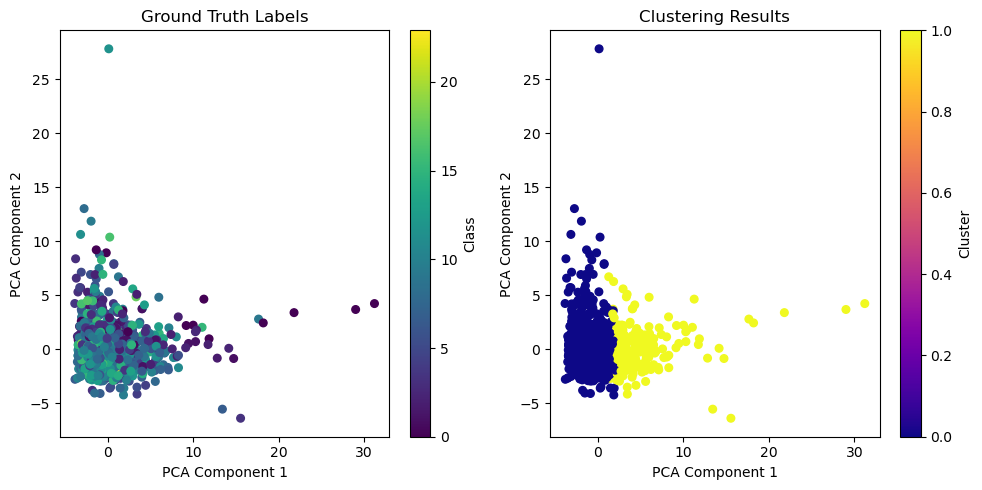

In [12]:
# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the results with ground truth labels
plt.figure(figsize=(10, 5))

# Subplot 1: Ground Truth Labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30)
plt.title("Ground Truth Labels")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class")

# Subplot 2: Clustering Results
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='plasma', s=30)
plt.title("Clustering Results")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()